In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs

from sklearn import preprocessing

import tensorflow
from keras.layers import Dense
from keras import Input, Model

In [2]:
# Make 3 blobs with 50 features
X,y= make_blobs(n_features=20, centers=3, n_samples=5000, cluster_std=0.2, center_box=[-1, 1], random_state=9)
X.shape, y.shape

((5000, 20), (5000,))

In [3]:
X = preprocessing.normalize(X)

In [4]:
# Latent space dimension
encoding_dim = 2

# Input layer: 50 features
input = Input(shape=(X.shape[1],))

# Encoded representation of input
encoded = Dense(encoding_dim, activation='sigmoid')(input)

# Decoded representation of latent space 
decoded = Dense(X.shape[1], activation='tanh')(encoded)

# Autoencoder model with encoder and decoder segments
autoencoder = Model(input, decoded)

2021-12-04 18:47:47.211166: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Separating encoder model from autoencoder
encoder = Model(input, encoded)

In [6]:
autoencoder.compile(optimizer='adam', loss='mse')

In [7]:
# Train on input data
autoencoder.fit(X, X, epochs=60)

Epoch 1/60
157/157 [==============================] - 1s 2ms/step - loss: 0.0537
Epoch 2/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 3/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 4/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 5/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 6/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 7/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 8/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 9/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 10/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 11/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 12/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 13/60
157/157 [====

In [8]:
# Map raw input to latent space
latent = encoder.predict(X)
latent.shape

(5000, 2)

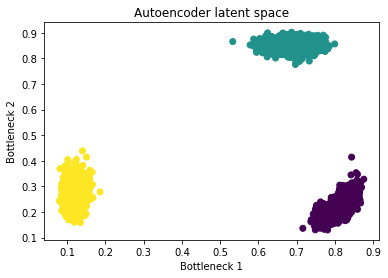

In [9]:
plt.scatter(latent[:, 0], latent[:, 1], c=y)
plt.xlabel('Bottleneck 1')
plt.ylabel('Bottleneck 2')
plt.title('Autoencoder latent space')
plt.show()

## Deep Autoencoder

In [10]:
# Latent space dimension
deep_encoding_dim = 2

# Input layer: 50 features
deep_input = Input(shape=(X.shape[1],))

deep_encoded = Dense(10, activation='sigmoid')(deep_input)

deep_encoded = Dense(5, activation='sigmoid')(deep_encoded)

# Encoded representation of input
deep_encoded = Dense(deep_encoding_dim, activation='sigmoid')(deep_encoded)

deep_decoded = Dense(5, activation='tanh')(deep_encoded)

deep_decoded = Dense(10, activation='tanh')(deep_decoded)

# Decoded representation of latent space 
deep_decoded = Dense(X.shape[1], activation='tanh')(deep_decoded)

# Autoencoder model with encoder and decoder segments
deepautoencoder = Model(deep_input, deep_decoded)

In [11]:
# Separating encoder model from autoencoder
deepencoder = Model(deep_input, deep_encoded)

In [12]:
deepautoencoder.compile(optimizer='adam', loss='mse')

In [13]:
# Train on input data
deepautoencoder.fit(X, X, epochs=60)

Epoch 1/60
157/157 [==============================] - 1s 3ms/step - loss: 0.0366
Epoch 2/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 3/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 4/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 5/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 6/60
157/157 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 7/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 8/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 9/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 10/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 11/60
157/157 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 12/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 13/60
157/157 [====

In [14]:
# Map raw input to latent space
deeplatent = deepencoder.predict(X)
deeplatent.shape

(5000, 2)

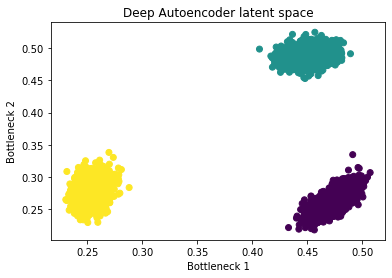

In [15]:
plt.scatter(deeplatent[:, 0], deeplatent[:, 1], c=y)
plt.xlabel('Bottleneck 1')
plt.ylabel('Bottleneck 2')
plt.title('Deep Autoencoder latent space')
plt.show()